# Exploratory Data Analysis

### Created by Nurlan Ismayil


In [2]:
pip install inventorize3

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for inventorize3: filename=inventorize3-0.0.1-py3-none-any.whl size=15599 sha256=e3d8598d07ec422ab030e16493033e967e668d95d642db18b0a481b4205d8d58
  Stored in directory: c:\users\galaxy computers\appdata\local\pip\cache\wheels\1f\68\05\389c52c15bf1305e1d018692bddcc2e64b23130fbd4b2d2e15
Successfully built inventorize3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import inventorize3 as inv
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
dosya_yolu = r'C:\\Users\\Nurlan\\Downloads\\sales_final_data.csv'
sales = pd.read_csv(dosya_yolu);sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date,gross_margin,period,dow,hour,date,revenue
0,141234,iPhone,5638008983335,smartphones,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00,0.67,2023-01,Sunday,09 PM,2023-01-22,700.00
1,141235,Lightning Charging Cable,5563319511488,charging cables,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00,0.50,2023-01,Saturday,02 PM,2023-01-28,14.95
2,141236,Wired Headphones,2113973395220,headphones,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00,0.50,2023-01,Tuesday,01 PM,2023-01-17,23.98
3,141237,27in FHD Monitor,3069156759167,monitors,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00,0.35,2023-01,Thursday,08 PM,2023-01-05,149.99
4,141238,Wired Headphones,9692680938163,headphones,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00,0.50,2023-01,Wednesday,11 AM,2023-01-25,11.99


### 1. 2023 Sales Performanceld

In [8]:
total_sales = sales['sales'].sum()
total_profit = sales['gross_profit'].sum()
num_orders = sales['order_id'].nunique()

print(f'Total sales or GMV for 2023 is: ${total_sales/1000000: .2f} M')
print(f'Total profit for 2023 is: ${total_profit/1000000: .2f} M')
print(f'Gross Margin for 2023:{(total_profit/total_sales) * 100: .2f} %')
print(f'Total number of orders for 2023 is: {num_orders:}')

Total sales or GMV for 2023 is: $ 31.24 M
Total profit for 2023 is: $ 19.42 M
Gross Margin for 2023: 62.15 %
Total number of orders for 2023 is: 161119


### 2. What are the highest- performing products?
    a. Based on profit  
    b. based on sales   
    c. based on quantity sold

In [9]:
# What are the top 5 highest-performing products based on profit?

top5_prod_profit = sales.groupby(['product'])['gross_profit'].sum().sort_values(ascending=False)[:5]
top5_prod_profit

product
Macbook Pro Laptop        4.871503e+06
iPhone                    2.914835e+06
ThinkPad Laptop           2.501755e+06
Google Phone              2.023266e+06
27in 4K Gaming Monitor    1.473433e+06
Name: gross_profit, dtype: float64

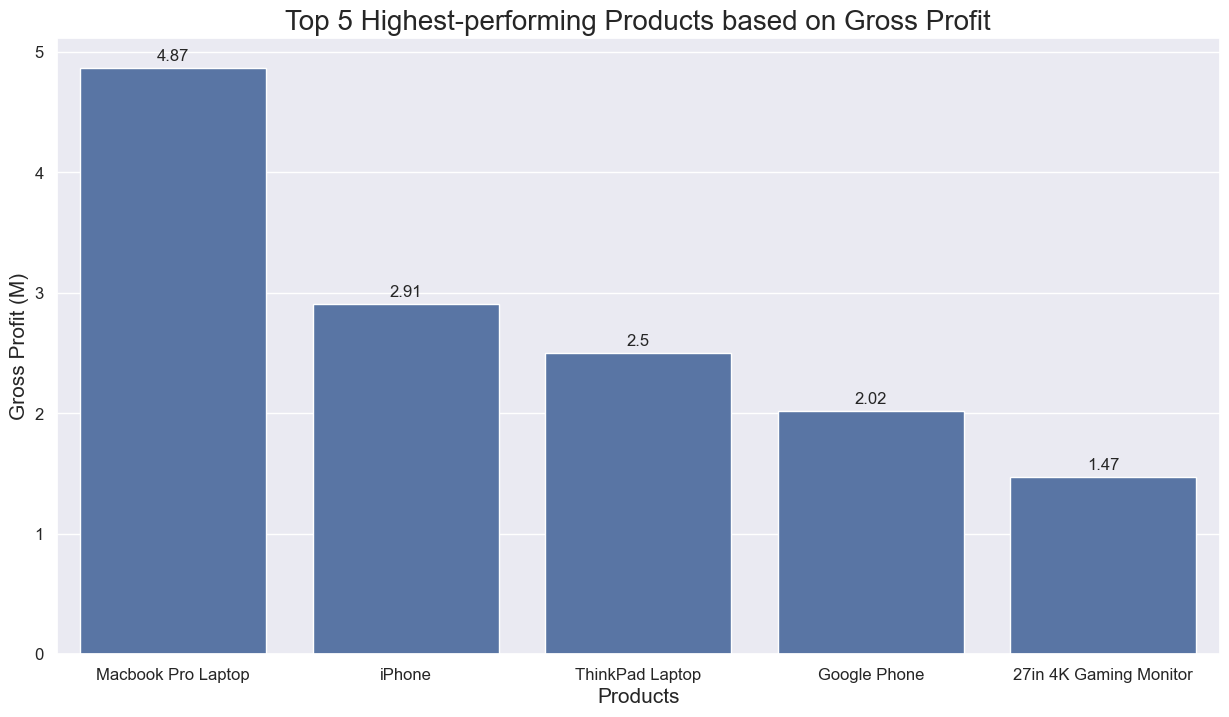

In [10]:
# Visualize the top 5 highest-performing products based on profit

top5_prod_profit = (sales.groupby(['product'])['gross_profit'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_profit.index, y = top5_prod_profit.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Products based on Gross Profit', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Gross Profit (M)', size = 15)
plt.show;

In [11]:
# What are the top 5 highest-performing products based on total sales?

top5_prod_sales = sales.groupby(['product'])['sales'].sum().sort_values(ascending=False)[:5]
top5_prod_sales

product
Macbook Pro Laptop        7270900.00
iPhone                    4350500.00
ThinkPad Laptop           3733962.66
Google Phone              3019800.00
27in 4K Gaming Monitor    2199153.61
Name: sales, dtype: float64

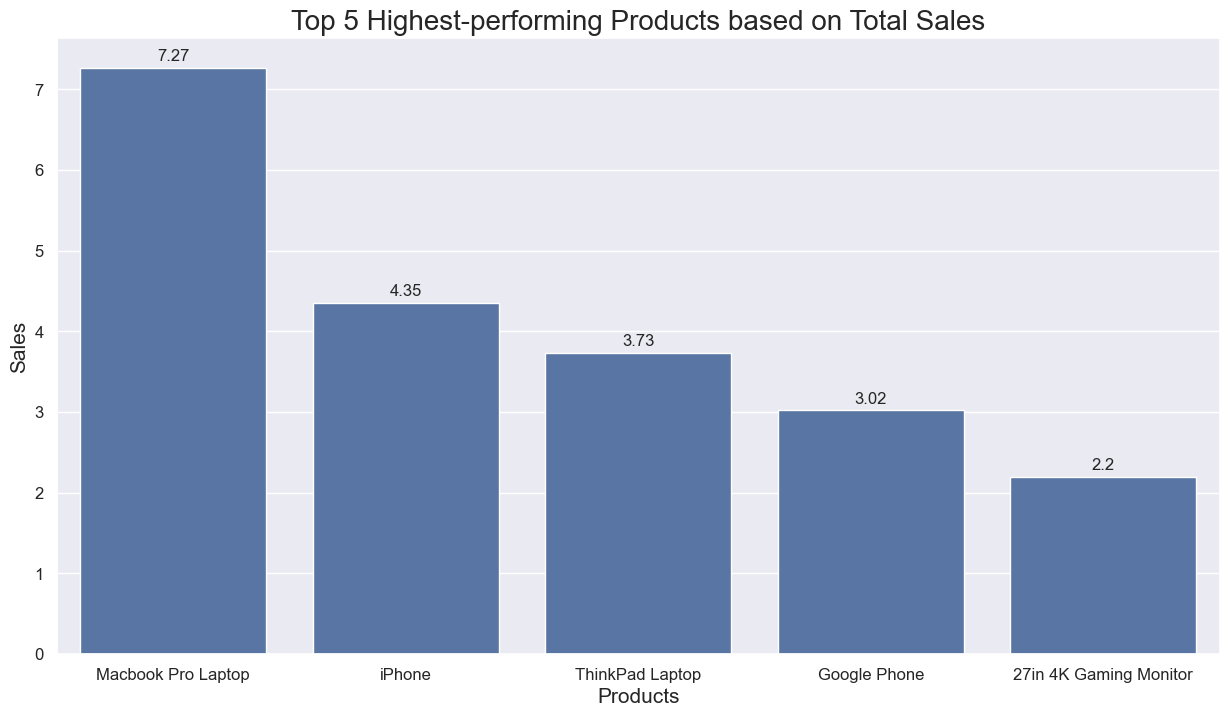

In [12]:
# Visualize top 5 highest-performing products based on total sales

top5_prod_sales = (sales.groupby(['product'])['sales'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_sales.index, y = top5_prod_sales.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3) 

plt.title('Top 5 Highest-performing Products based on Total Sales', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Sales', size = 15)
plt.show;

In [13]:
# What are the top 5 highest-performing products based on quantity sold?

top5_prod_qty = sales.groupby(['product'])['quantity'].sum().sort_values(ascending=False)[:5]
top5_prod_qty

product
AAA Batteries (4-pack)      28077
AA Batteries (4-pack)       25062
USB-C Charging Cable        21705
Lightning Charging Cable    21110
Wired Headphones            18637
Name: quantity, dtype: int64

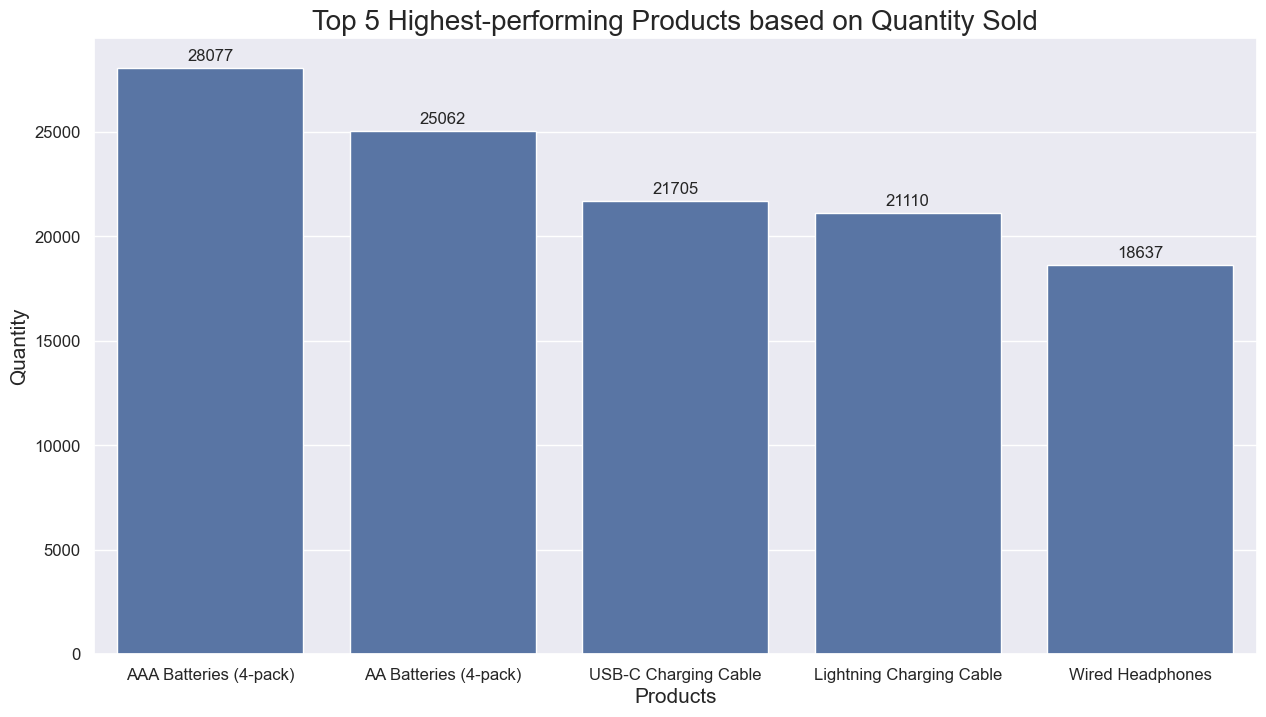

In [14]:
# Visualize the top 5 most popular products based on quantity sold?

top5_prod_qty = sales.groupby(['product'])['quantity'].sum().sort_values(ascending=False)[:5]

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_qty.index, y = top5_prod_qty.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Products based on Quantity Sold', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Quantity', size = 15)
plt.show;

* Based on sales and gross profit, the higest-performing product is Macbook Pro laptop. It generated sales of $8.04M and profit of $5.38M. While AAA *

* Batteries (4-pack) has the most number of units sold at 31,012 units.
This indicates that Macbook Pro Laptop has higher selling price and higher profit margin.

### Laptops Category Performance Over Time

In [15]:
# Laptops category monthly sales

laptop_sales = sales[sales['category'] == 'laptops'].groupby(['period'])['sales'].sum().reset_index()
laptop_sales

,period,sales
0,2023-01,614797.83
1,2023-02,744197.25
2,2023-03,989296.55
3,2023-04,1161796.10
4,2023-05,1161496.29
5,2023-06,919196.86
6,2023-07,944596.81
7,2023-08,782297.26
8,2023-09,738597.51
9,2023-10,1353495.39


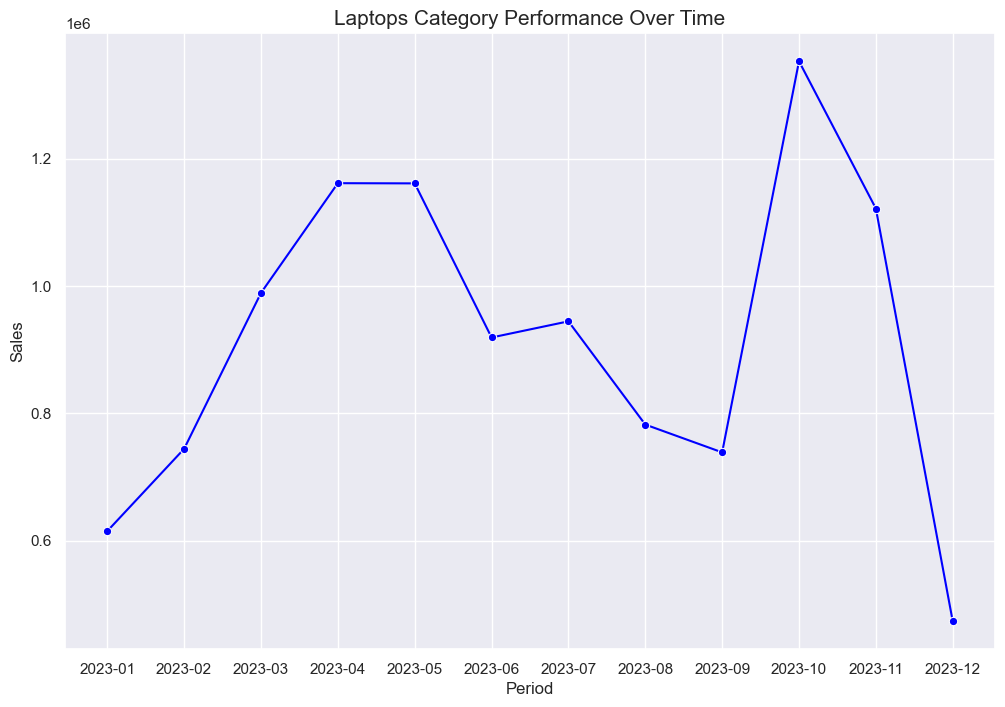

In [16]:
# Visualize Laptops Category Performance Over Time

plt.figure(figsize = [12, 8])
# convert period to datetime as seaborn and matplotlib don't support line plotting with period datatype
sns.lineplot(data=laptop_sales, x = laptop_sales['period'].astype(str), y = 'sales', color = 'blue', marker = 'o')

plt.title('Laptops Category Performance Over Time', fontsize = 15)
plt.xlabel('Period', size = 12)
plt.ylabel('Sales', size = 12)
plt.show()

* For 2019, products in the laptops category have higher sales during the months of April, May, and October to December. If this pattern remained the same in the past 3 or more years, the seller may need to consider stocking up more inventory during those months.

### 6 Sales Performance and Gross Profit Over Time


In [17]:
# Monthly sales and profit

monthly_perf = sales.groupby(['period']).agg({
                                                'sales': 'sum',
                                                'gross_profit': 'sum'}).reset_index()
monthly_perf

,period,sales,gross_profit
0,2023-01,1813586.44,1.127681e+06
1,2023-02,2202022.42,1.369115e+06
2,2023-03,2807100.38,1.741473e+06
3,2023-04,3390670.24,2.109617e+06
4,2023-05,3152606.75,1.965322e+06
5,2023-06,2577802.26,1.602693e+06
6,2023-07,2647775.76,1.642685e+06
7,2023-08,2244467.88,1.396144e+06
8,2023-09,2097560.13,1.300184e+06
9,2023-10,3736726.88,2.325213e+06


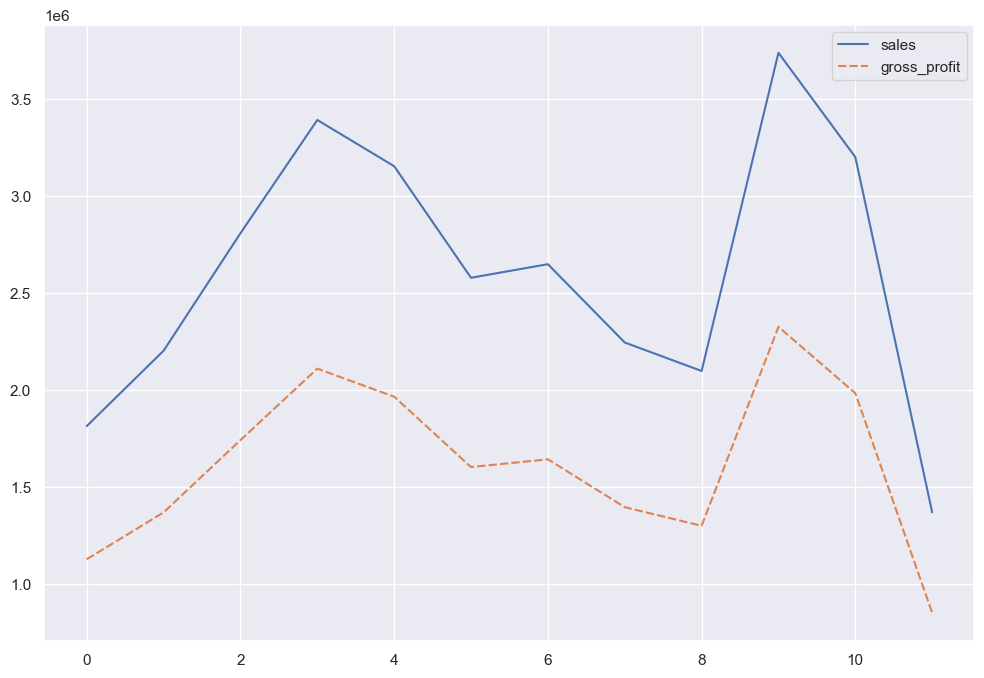

In [18]:
plt.figure(figsize = [12, 8])
ax = sns.lineplot(data = monthly_perf)

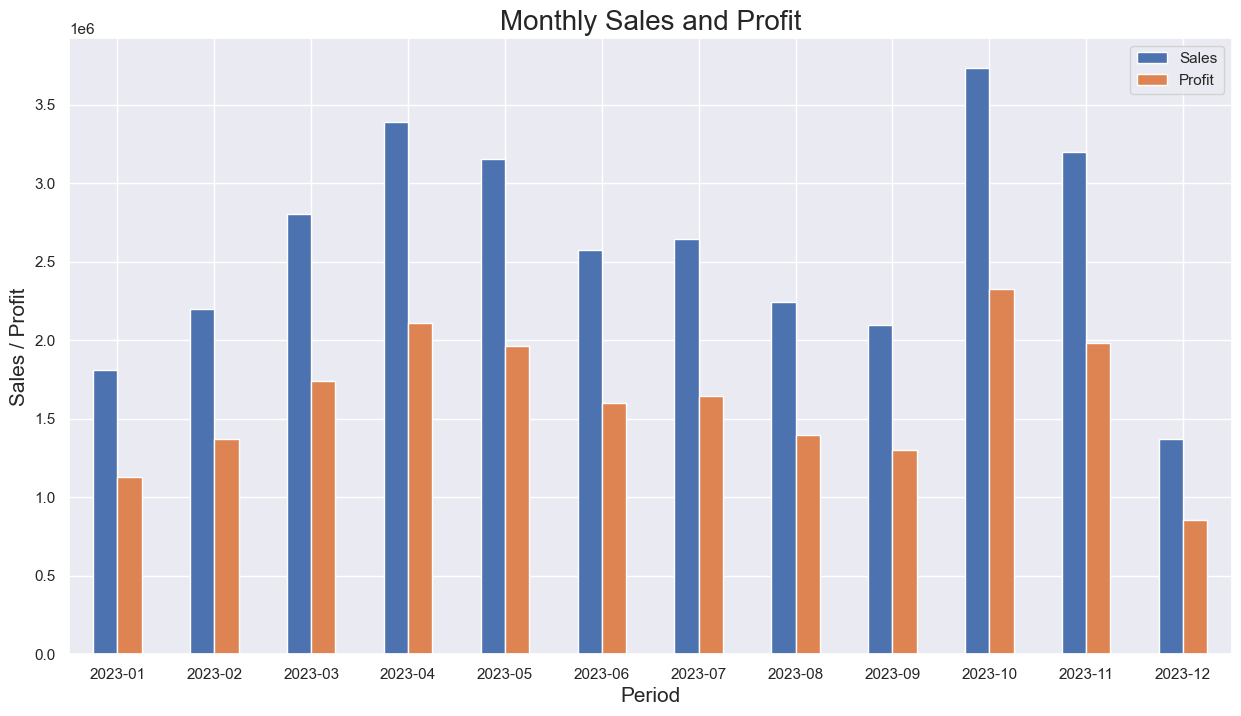

In [19]:
# Visualize monthly sales vs monthly profit (stacked bar)

monthly_perf.plot(kind='bar', x = 'period', figsize = (15, 8))
plt.title('Monthly Sales and Profit', fontsize = 20)
plt.xlabel('Period', fontsize = 15)
plt.ylabel('Sales / Profit', fontsize = 15)
plt.legend(["Sales", "Profit"])
plt.rcParams["axes.formatter.limits"] = (0, 4000000)
plt.xticks(rotation = 360)
plt.show()

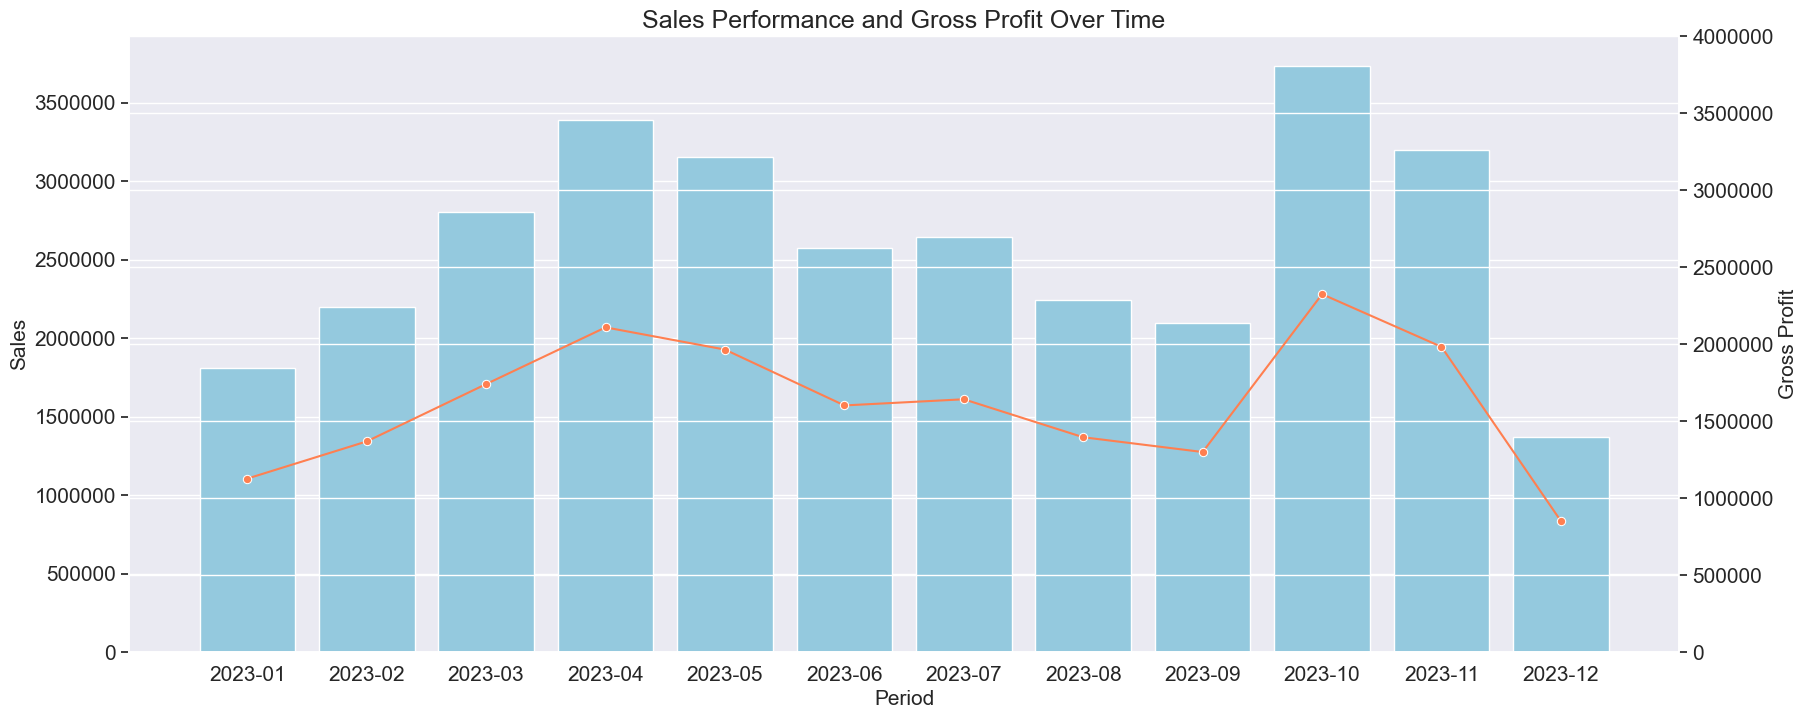

In [20]:
# Visualize monthly sales vs monthly profit (barplot & lineplot with dual y axis)

# convert period to datetime as seaborn and matplotlib don't support period datatype
monthly_perf['period'] = monthly_perf['period'].astype(str)

fig, ax1 = plt.subplots(figsize=[20, 8])
sns.barplot(x='period', y='sales', data=monthly_perf, ax=ax1, color='skyblue')
ax1.set_xlabel('Period', fontsize = 15)
ax1.set_ylabel('Sales', fontsize = 15)
ax1.ticklabel_format(style='plain', axis="y")
ax1.tick_params(axis = 'both', labelsize = 15)


ax2 = ax1.twinx()
sns.lineplot(x='period', y='gross_profit', data=monthly_perf, ax=ax2, color='coral', marker='o')
ax2.set_ylabel('Gross Profit', fontsize = 15)
ax2.ticklabel_format(style='plain', axis="y")
ax2.tick_params(axis = 'both', labelsize = 15)
ax2.set_ylim(0, 4000000)
plt.title('Sales Performance and Gross Profit Over Time', fontsize = 18)

plt.show()

* The lineplot, grouped bar chart and combined barplot and lineplot clearly show that the sales and profit have a perfect positive relationship.

### Statistical relationships between quantity, price, cost, sales, pross_profit, gross_margin, and hour


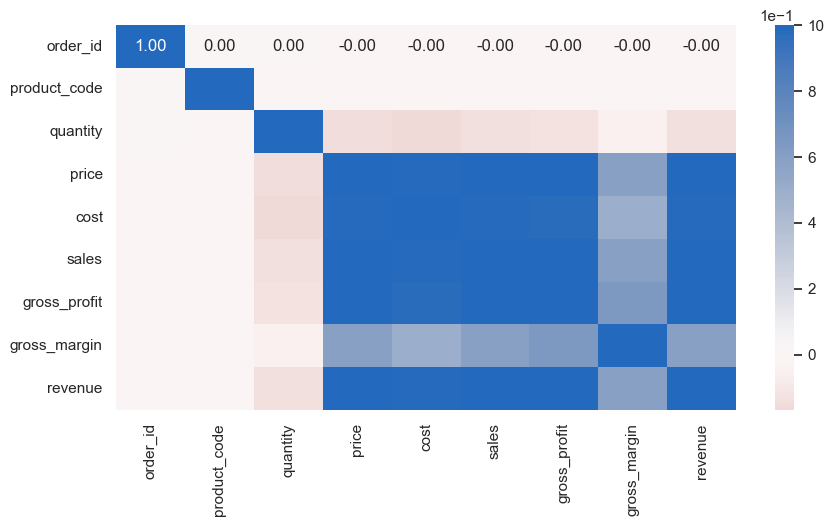

In [21]:
# create a correlation plot between numerical variables
num_var = sales.select_dtypes(include=['int','float']).columns.tolist()

plt.figure(figsize = [10, 5])
sns.heatmap(sales[num_var].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

* There is a weak negative correlation between quantity and price, cost, sales, gross profit, and gross margin.
* There is a perfect positive correlation between cost, price, sales, and gross profit.
* There is a strong positive correlation between gross margin and price, cost, sales, and gross profit

### Compare product performance:
    a. Do the most profitable products also have the highest sales?
    b. Do products with the highest unit sales also have the best profitability?
    c. Do products with high sales also have high profit margins?
    d. Do the products with the highest number of sold units also yield the highest profit margins?

In [22]:
prod_perf = sales.groupby(['product']).agg({
                                'sales': 'sum',
                                'gross_margin': 'mean',
                                'gross_profit': 'sum',
                                'quantity':'sum'}).sort_values('sales', ascending=False)
prod_perf

,sales,gross_margin,gross_profit,quantity
product,,,,
Macbook Pro Laptop,7270900.00,0.67,4.871503e+06,4277
iPhone,4350500.00,0.67,2.914835e+06,6215
ThinkPad Laptop,3733962.66,0.67,2.501755e+06,3734
Google Phone,3019800.00,0.67,2.023266e+06,5033
27in 4K Gaming Monitor,2199153.61,0.67,1.473433e+06,5639
34in Ultrawide Monitor,2130983.92,0.67,1.427759e+06,5608
Apple Airpods Headphones,2129700.00,0.35,7.453950e+05,14198
Flatscreen TV,1306800.00,0.67,8.755560e+05,4356
Bose SoundSport Headphones,1215578.43,0.50,6.077892e+05,12157


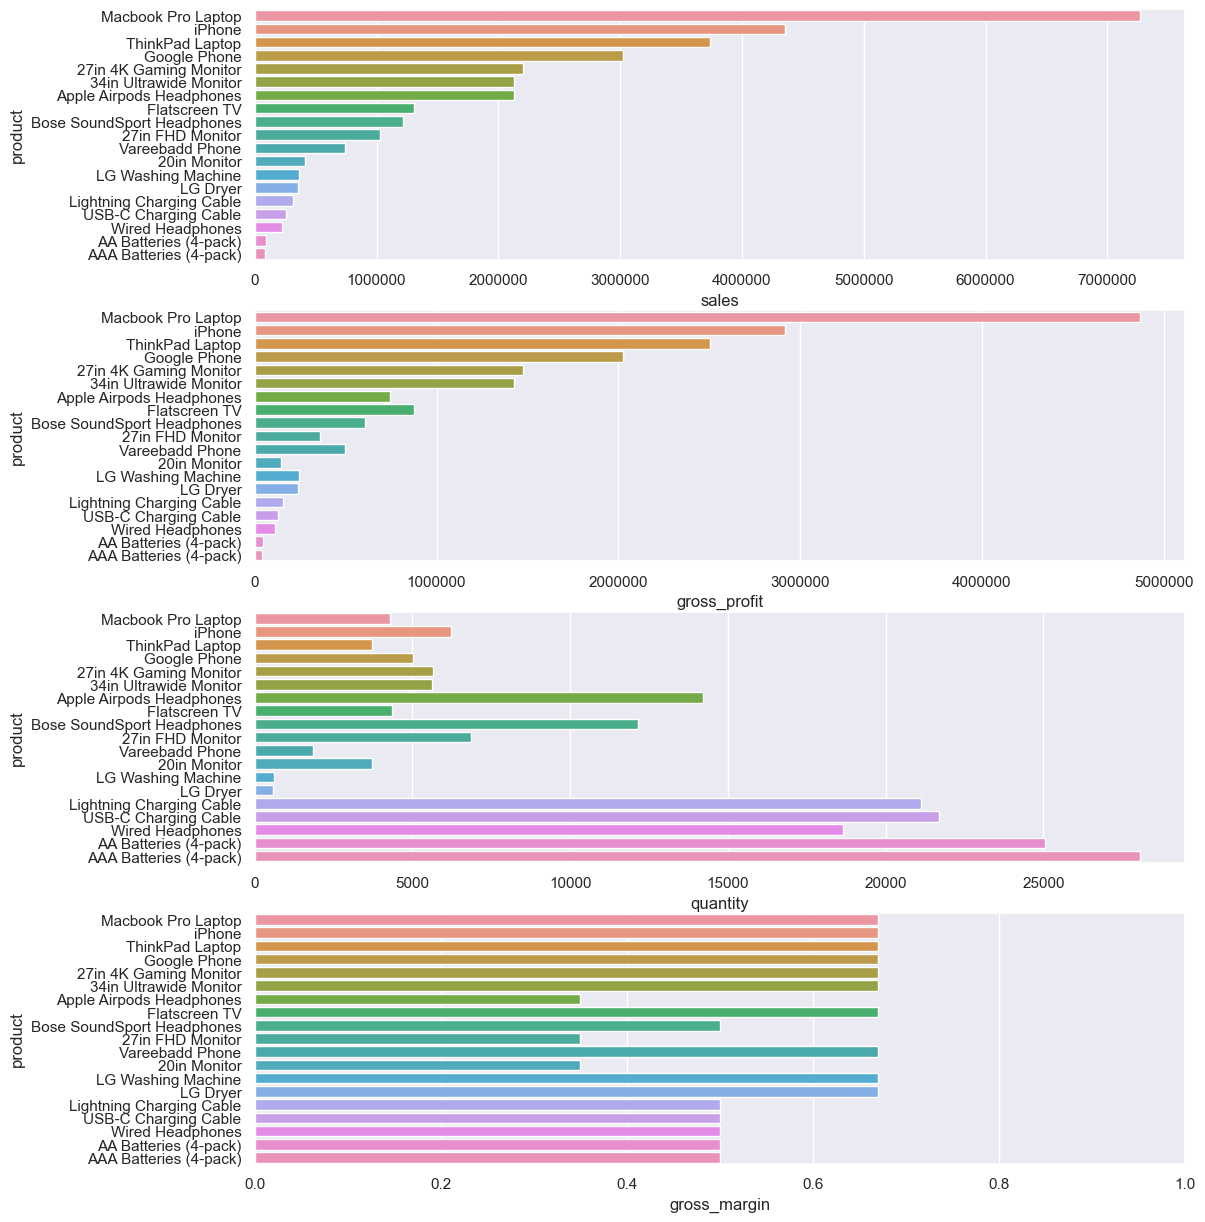

In [23]:
plt.figure(figsize = [12, 15])

# Subplot 1: total sales per product
ax1 = plt.subplot(4, 1, 1)
sns.barplot( x = prod_perf['sales'], y = prod_perf.index)

# Subplot 2: total profit per product
ax2 = plt.subplot(4, 1, 2)
sns.barplot(x = prod_perf['gross_profit'], y = prod_perf.index)

# Subplot 3: total units sold per product
ax3 = plt.subplot(4, 1, 3)
sns.barplot(x = prod_perf['quantity'], y = prod_perf.index)

# Subplot 4: average gross margin per product
ax4 = plt.subplot(4, 1, 4)
sns.barplot(x = prod_perf['gross_margin'], y = prod_perf.index)
ax4.set_xlim(0, 1)

plt.show()

In [24]:
# Compare product performance based on profit and units sold

products_sales_qty = sales.groupby(['product']).agg({
                                'gross_profit': 'sum',
                                'quantity':'sum'}).sort_values(by = 'gross_profit', ascending = False)

products_sales_qty

,gross_profit,quantity
product,,
Macbook Pro Laptop,4.871503e+06,4277
iPhone,2.914835e+06,6215
ThinkPad Laptop,2.501755e+06,3734
Google Phone,2.023266e+06,5033
27in 4K Gaming Monitor,1.473433e+06,5639
34in Ultrawide Monitor,1.427759e+06,5608
Flatscreen TV,8.755560e+05,4356
Apple Airpods Headphones,7.453950e+05,14198
Bose SoundSport Headphones,6.077892e+05,12157


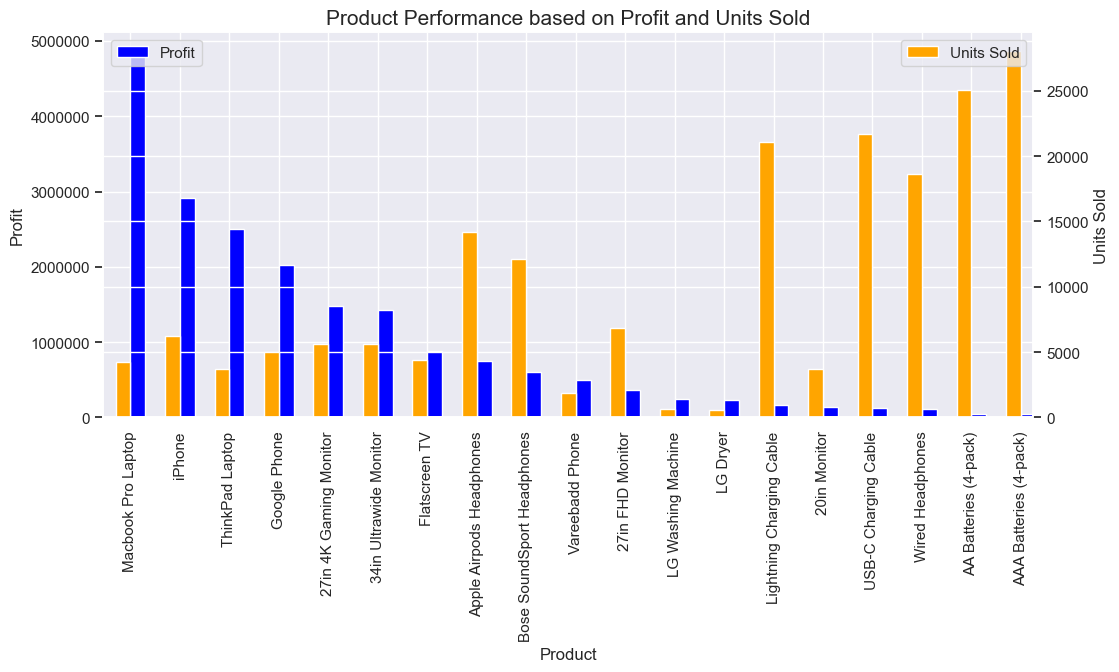

In [25]:
fig = plt.figure(figsize = [12, 5])

ax1 = fig.add_subplot(111) 
ax2 = ax1.twinx() # create another axes that share the same x-axis
width = .3

products_sales_qty['gross_profit'].plot(kind = 'bar', color = 'blue', ax = ax1, width = width, position = 0)
products_sales_qty['quantity'].plot(kind = 'bar', color = 'orange', ax = ax2, width = width, position = 1)


plt.title('Product Performance based on Profit and Units Sold', fontsize = 15)
ax1.set_ylabel('Profit', fontsize = 12)
ax1.set_xlabel('Product', fontsize = 12)
ax2.set_ylabel('Units Sold', fontsize = 12)
ax1.legend(['Profit'], loc = 'upper left')
ax2.legend(['Units Sold'], loc = 'upper right')

plt.show()

Reiterating the result of the correlation plot between numeric variables:
 
* There is a weak negative correlation between quantity and price, cost, sales, gross profit, and gross margin
* in .
There is a perfect positive correlation between cost, price, sales, and gross prof
* t.
There is a strong positive correlation between gross margin and price, cost, sales, and gross pr
  ofit
a. Do the most profitable products also have the highest sales?
Yes, products with the highest sales are also the most profitable.

b. Do products with the highest unit sales also have the best profitability?
No, products with the highest unit sales are not the most profitable.

c. Do products with high sales also have high profit margins?
Yes, product with high sales also have high profit margin.

d. Do the products with the highest number of sold units also yield the highest profit margins?
No, products with the highest number of units sold have lower profit margin.

### Compare sales across all cities

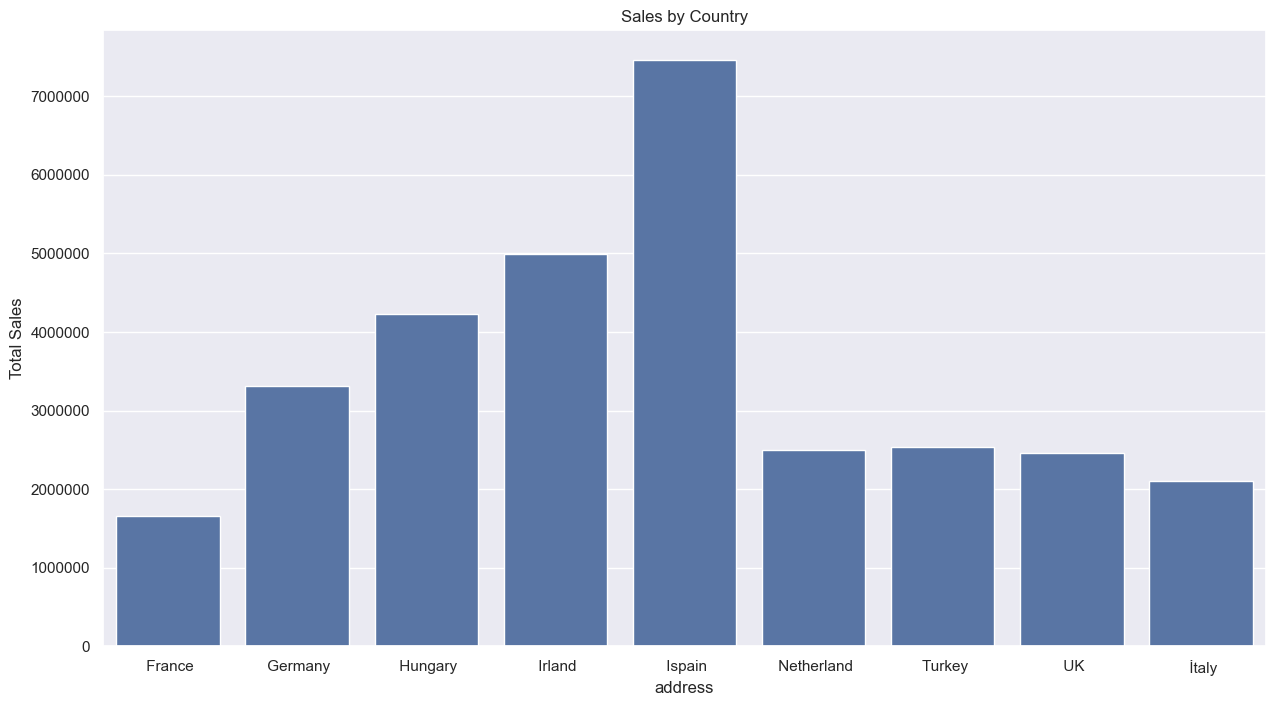

In [26]:
city_sales = sales.groupby(['address'])['sales'].sum()

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]

sns.barplot(x = city_sales.index, y = city_sales.values, color = base_color)
plt.title('Sales by Country')
plt.xlabel('address')
plt.ylabel('Total Sales')
plt.show()

* Ispain had the highest sales in 2023.

### What are the top products sold in Ispain?

In [61]:
Ispain_sales = sales[sales['address'].str.contains('Ispain')]
Ispain_prod = Ispain_sales.groupby(['product'])['sales'].sum().reset_index().sort_values(by = 'sales')
Ispain_prod

,product,sales
5,AAA Batteries (4-pack),19958.25
4,AA Batteries (4-pack),22786.56
17,Wired Headphones,53403.46
15,USB-C Charging Cable,63502.30
12,Lightning Charging Cable,75856.30
10,LG Dryer,79200.00
11,LG Washing Machine,96600.00
0,20in Monitor,98001.09
16,Vareebadd Phone,180400.00
2,27in FHD Monitor,244033.73


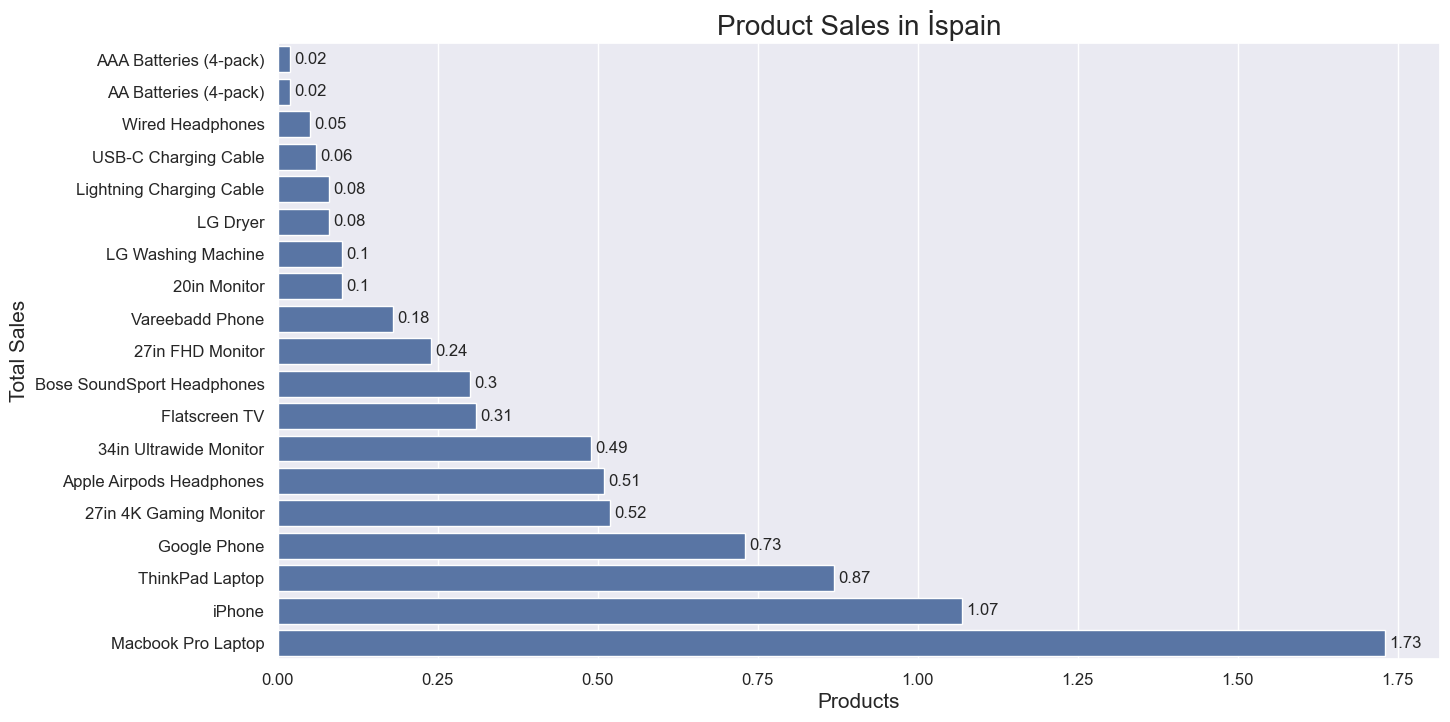

In [62]:
# Visualize the most popular products based on sales in Ispain

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = round(Ispain_prod['sales']/1000000, 2), y = Ispain_prod['product'], color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Product Sales in İspain', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show;

### Analyze the daily number of orders and daily sales

In [63]:
# Daily number of orders and daily sales

daily_perf = sales.groupby(['date']).agg({
                                    'order_id': 'nunique',
                                    'sales': 'sum'
})
daily_perf

,order_id,sales
date,,
2023-01-01,287,65681.94
2023-01-02,308,70813.20
2023-01-03,286,47046.20
2023-01-04,282,62012.21
2023-01-05,301,46524.63
...,...,...
2023-12-27,236,46367.27
2023-12-28,255,61531.76
2023-12-29,260,44663.60


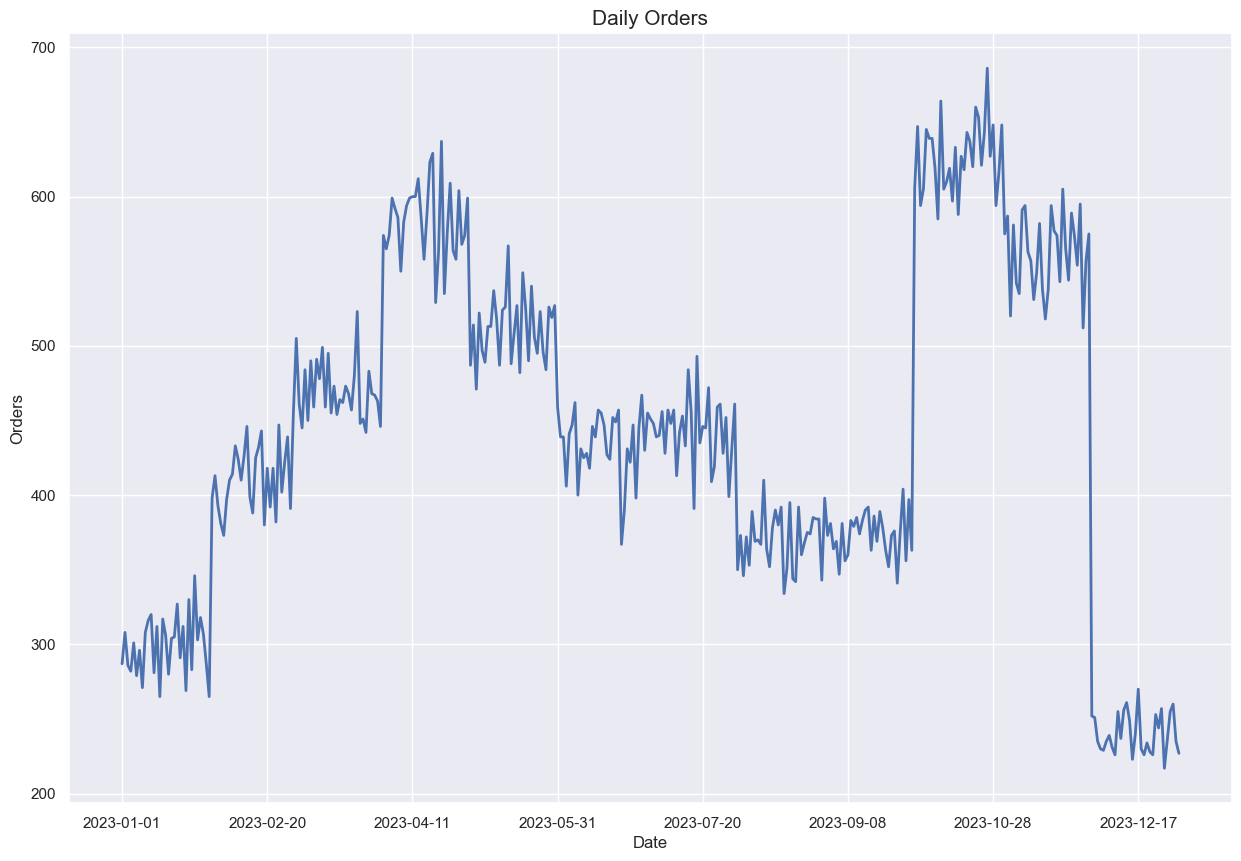

In [64]:
# Visualize daily orders

daily_perf['order_id'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Orders', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Orders', fontsize = 12)
plt.show()

* From January to May, orders increased consistently, but began to decrease until September, then increased again in October, dropped in November and increased again in December. December had the highest number of orders.

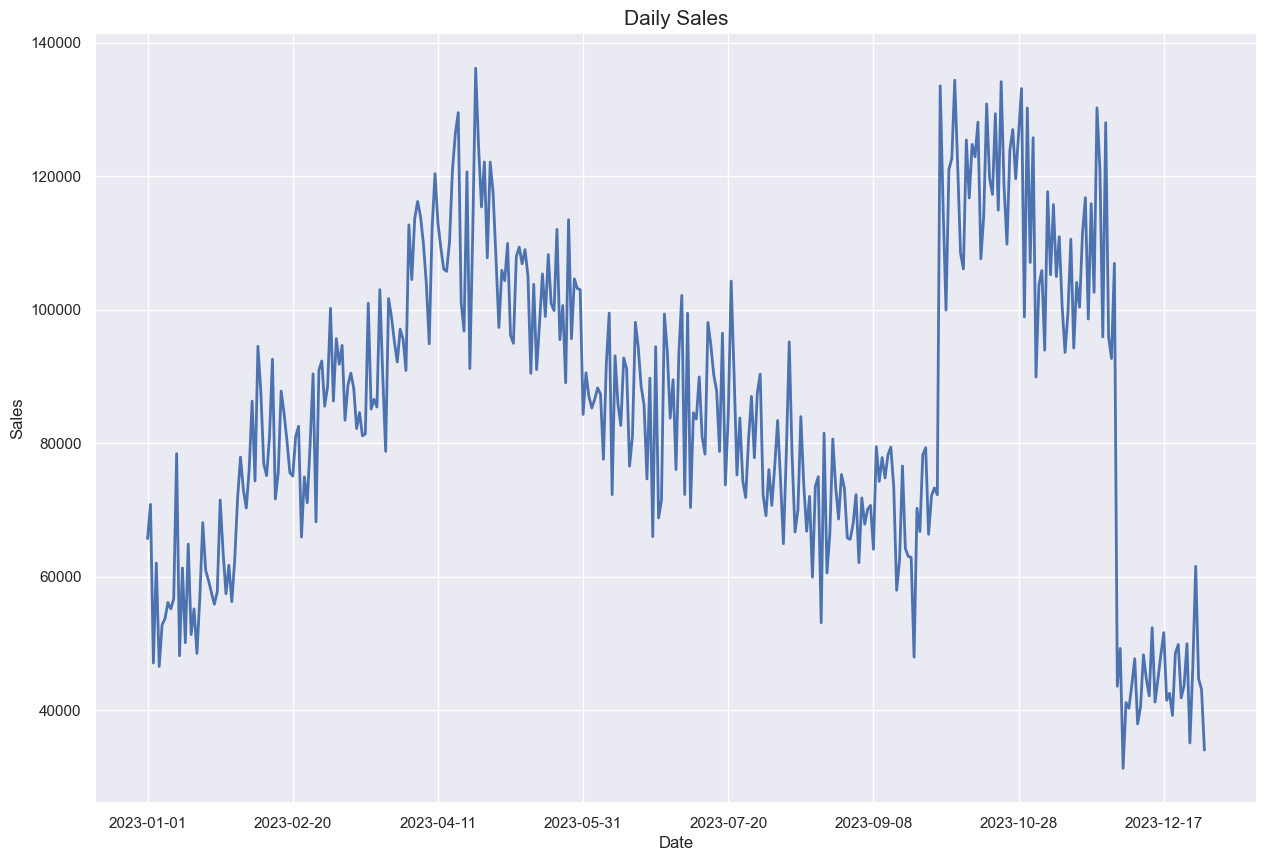

In [65]:
# Visualize daily sales

daily_perf['sales'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Sales', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.show()

* From January to May, sales increased consistently, but began to decrease until September, then increased again in October, dropped in November, and increased again in December. December had the highest sales

### Which times of the day generated the highest sales? highest profit?

In [66]:
# Convert hour and dow columns into ordered categorical types

ordered_var_dict = {'hour': ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', 
                             '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', 
                             '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM'],
                   'dow': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordered_var_dict:
    ordered_var = pd.CategoricalDtype(categories = ordered_var_dict[var], ordered = True)
    sales[var] = sales[var].astype(ordered_var)

In [67]:

# total sales and total profit per time of the day

hourly = sales.groupby(['hour']).agg({
                                    'sales': 'sum',
                                    'gross_profit': 'sum'}).reset_index().sort_values(by = 'hour')
hourly

,hour,sales,gross_profit
0,12 AM,642765.96,3.966538e+05
1,01 AM,411798.66,2.568486e+05
2,02 AM,206040.56,1.271737e+05
3,03 AM,134642.10,8.257613e+04
4,04 AM,148163.31,9.182930e+04
5,05 AM,208035.61,1.290682e+05
6,06 AM,412314.91,2.558883e+05
7,07 AM,663602.48,4.119566e+05
8,08 AM,1071782.35,6.682821e+05
9,09 AM,1478409.23,9.181844e+05


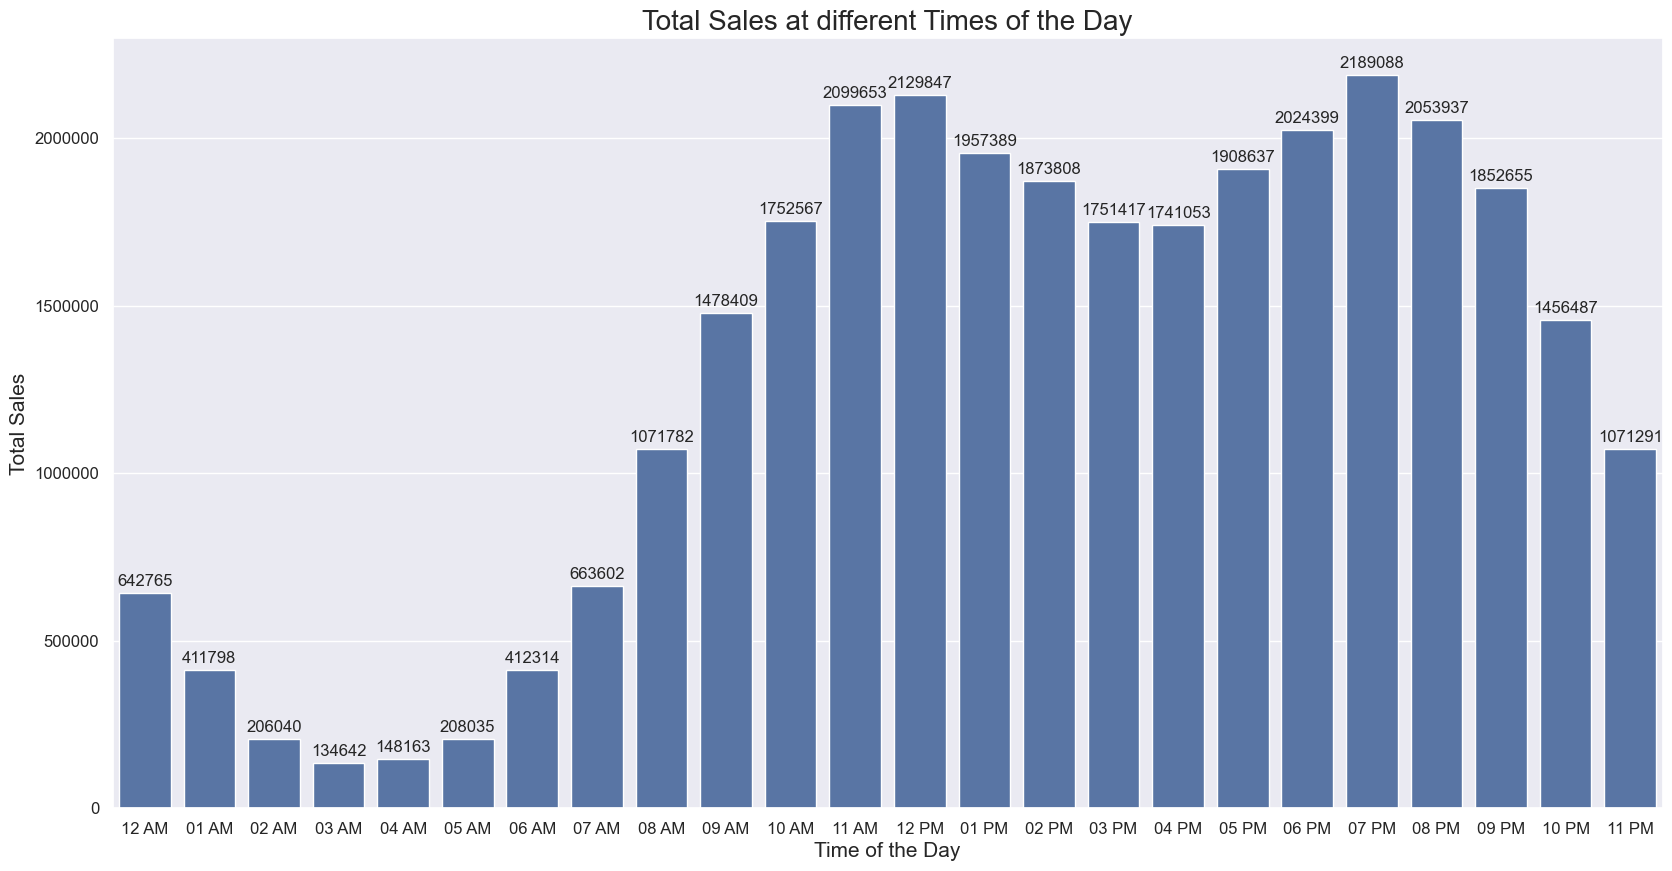

In [68]:
plt.figure(figsize = [20, 10]) 
base_color = sns.color_palette()[0]

ax = sns.barplot(data = hourly, x = hourly['hour'], y = hourly['sales'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Sales at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Total Sales', size = 15)

plt.show();

* Sales above $ 2 million were generated between 11AM and 2PM and between 5PM and 9PM.


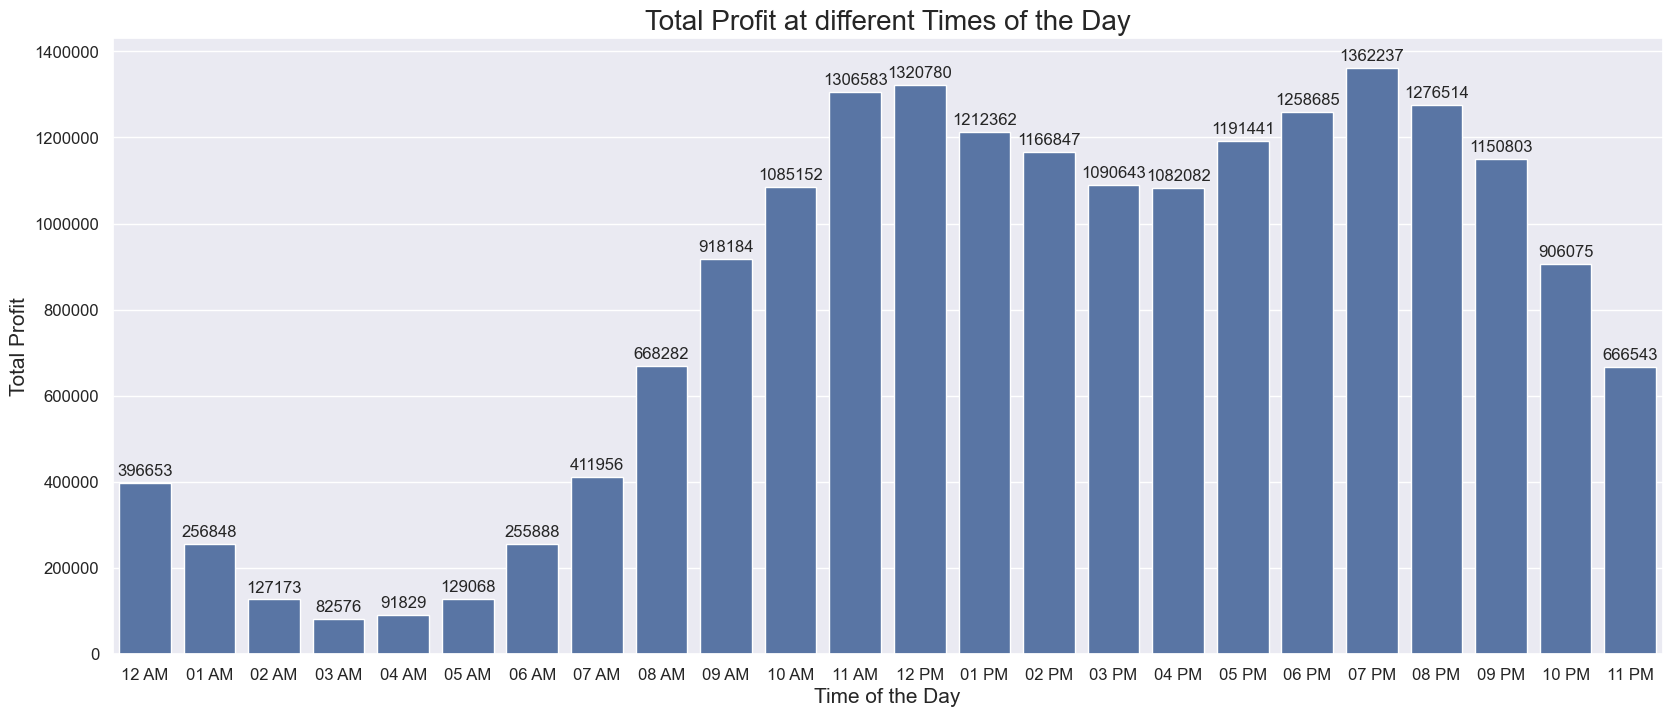

In [69]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(data = hourly, x = hourly['hour'], y = hourly['gross_profit'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Profit at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Total Profit', size = 15)

plt.show();

* Profit above $1.3 million were generated between 11AM and 1PM and between 5PM and 8PM.


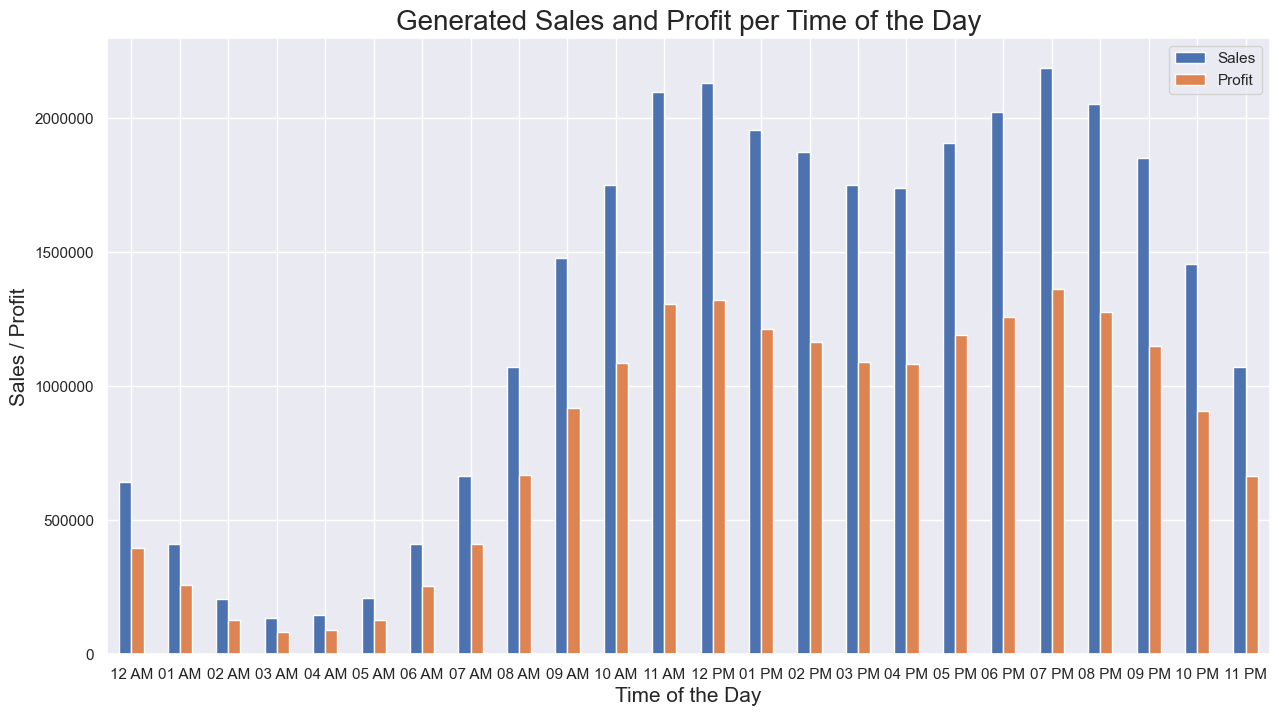

In [71]:
# Visualize monthly sales vs monthly profit (grouped bar)

hourly.plot(kind='bar', x = 'hour', figsize = (15, 8))
plt.title('Generated Sales and Profit per Time of the Day', fontsize = 20)
plt.xlabel('Time of the Day', fontsize = 15)
plt.ylabel('Sales / Profit', fontsize = 15)
plt.legend(["Sales", "Profit"])
plt.xticks(rotation = 360)
plt.show()

### Which day of the week has the highest number of orders?

In [72]:
weekday_perf = sales.groupby(['dow']).agg({
                                            'order_id': 'nunique',
                                            'sales': 'sum'}).reset_index()
weekday_perf

,dow,order_id,sales
0,Monday,23217,4537352.77
1,Tuesday,23141,4417462.08
2,Wednesday,23036,4445527.28
3,Thursday,23314,4532861.73
4,Friday,22809,4414406.12
5,Saturday,22759,4342542.45
6,Sunday,23417,4549635.40


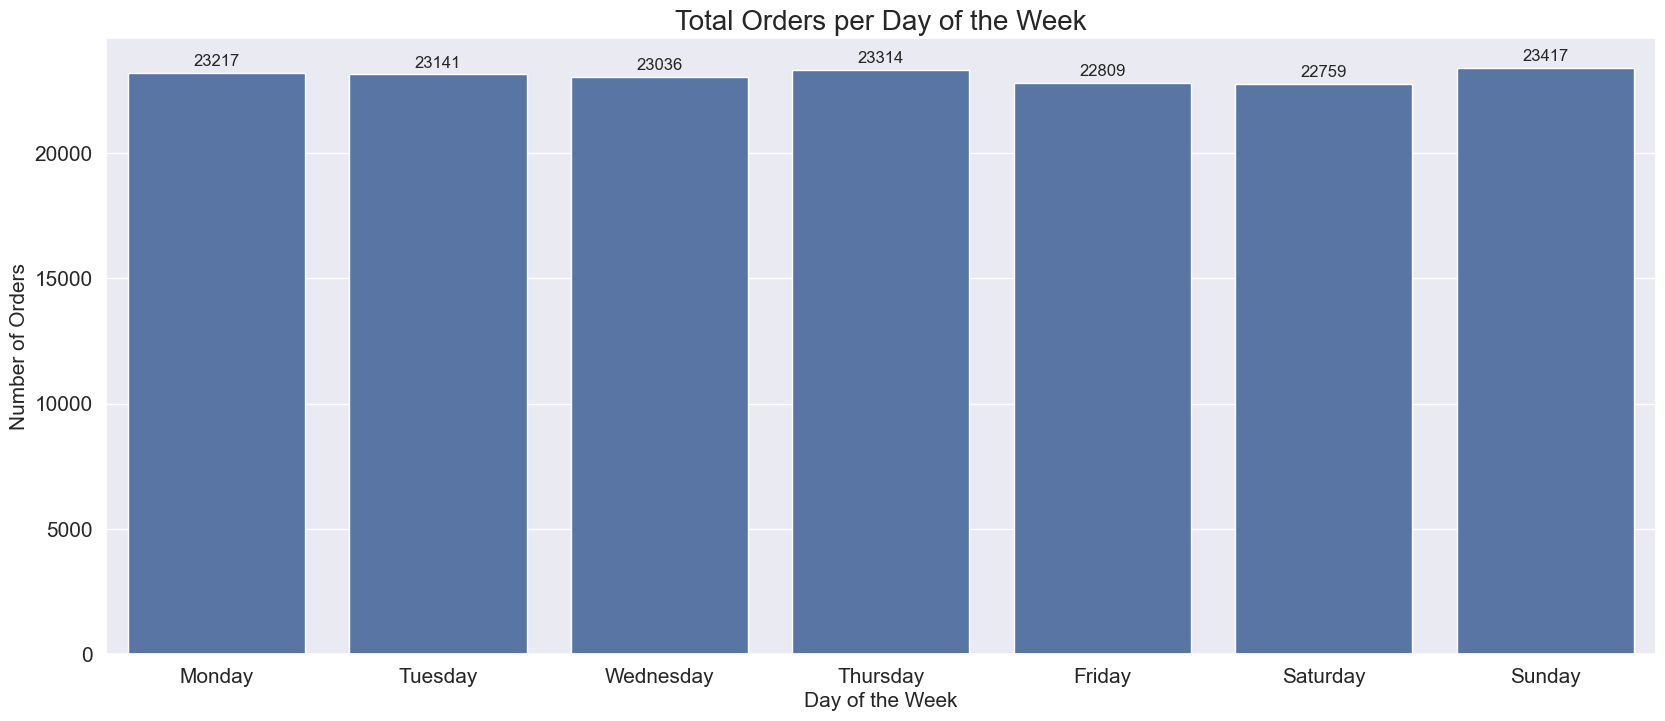

In [73]:
# Visualize number of orders per day of the week

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = weekday_perf['dow'], y = weekday_perf['order_id'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12)

plt.title('Total Orders per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.show();

* It's surprising that orders per day of the week have stayed consistent for 2019 with an average of 25,485.


### Which day of the week has the highest sales generated?

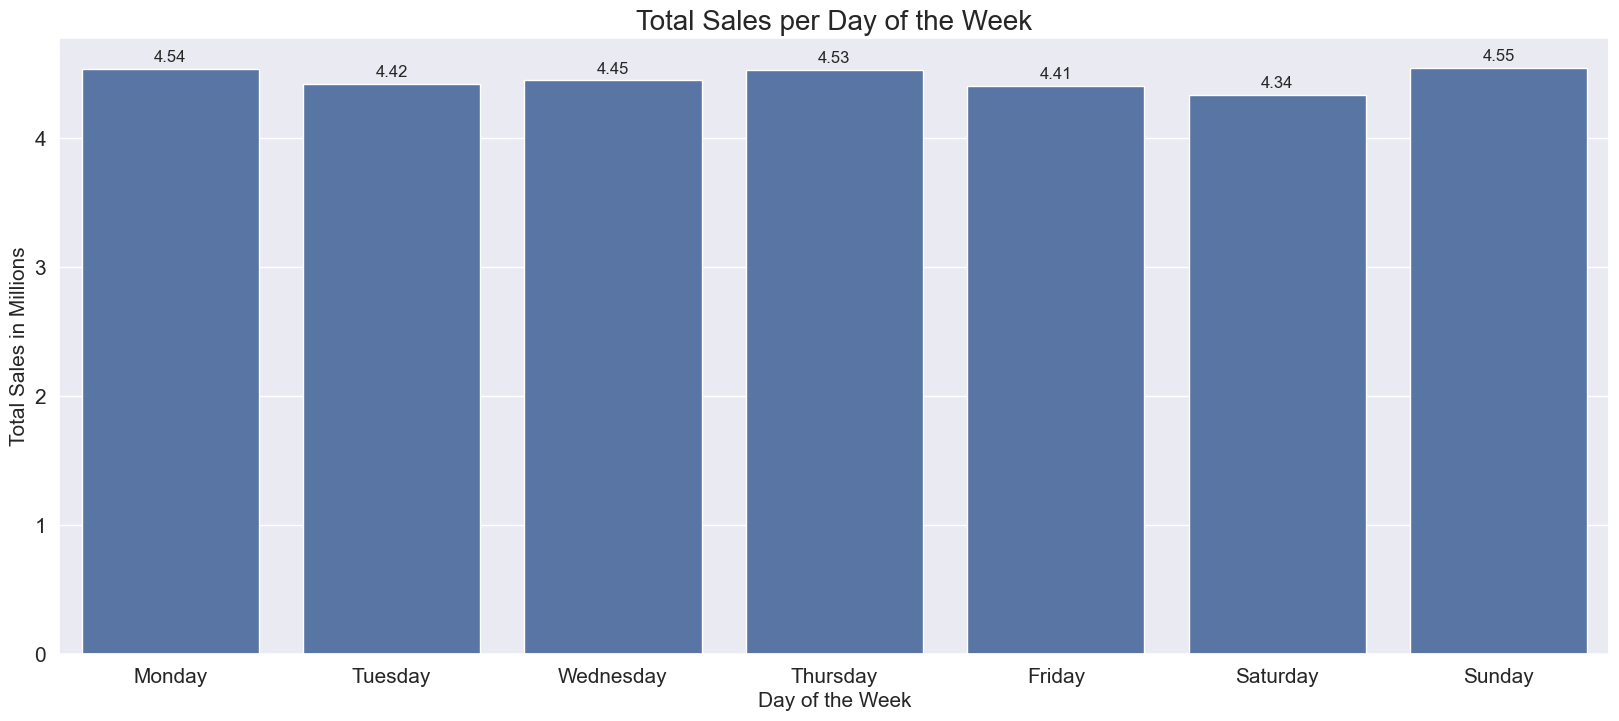

In [74]:
# Visualize total sales per day of the week

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = weekday_perf['dow'], y = round(weekday_perf['sales']/1000000, 2), color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12)

plt.title('Total Sales per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Total Sales in Millions', size = 15)
plt.show();

* Sales generated per day of the week has also been consistent at average sales of $4.9 million

### Performance per Category Over Time based on Sales

In [77]:
sales_by_cat = sales.groupby(['period', 'category'])['sales'].sum().reset_index()
sales_by_cat

,period,category,sales
0,2023-01,appliance,48600.00
1,2023-01,batteries,10237.21
2,2023-01,charging cables,32509.40
3,2023-01,headphones,200954.60
4,2023-01,laptops,614797.83
...,...,...,...
91,2023-12,headphones,155232.40
92,2023-12,laptops,473098.55
93,2023-12,monitors,260910.26
94,2023-12,smartTV,61200.00


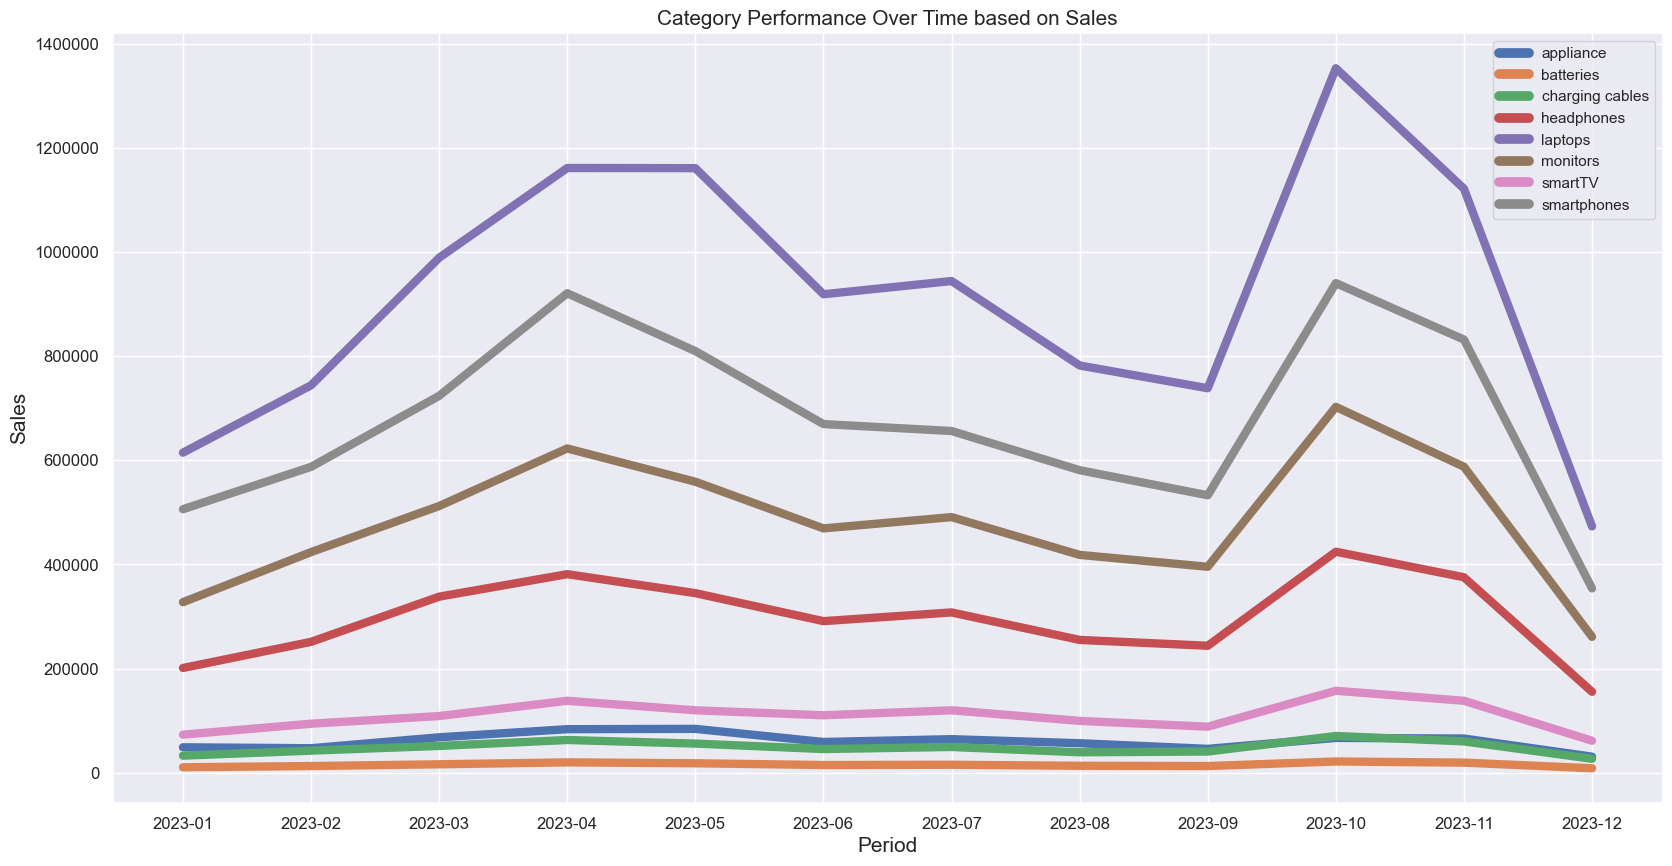

In [78]:
fig = plt.figure(figsize = [20, 10])

ax = sns.lineplot(data=sales_by_cat, x = sales_by_cat['period'].astype(str), y = 'sales', hue = 'category', linewidth = 6)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('Category Performance Over Time based on Sales', size = 15)

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(7)

plt.show()

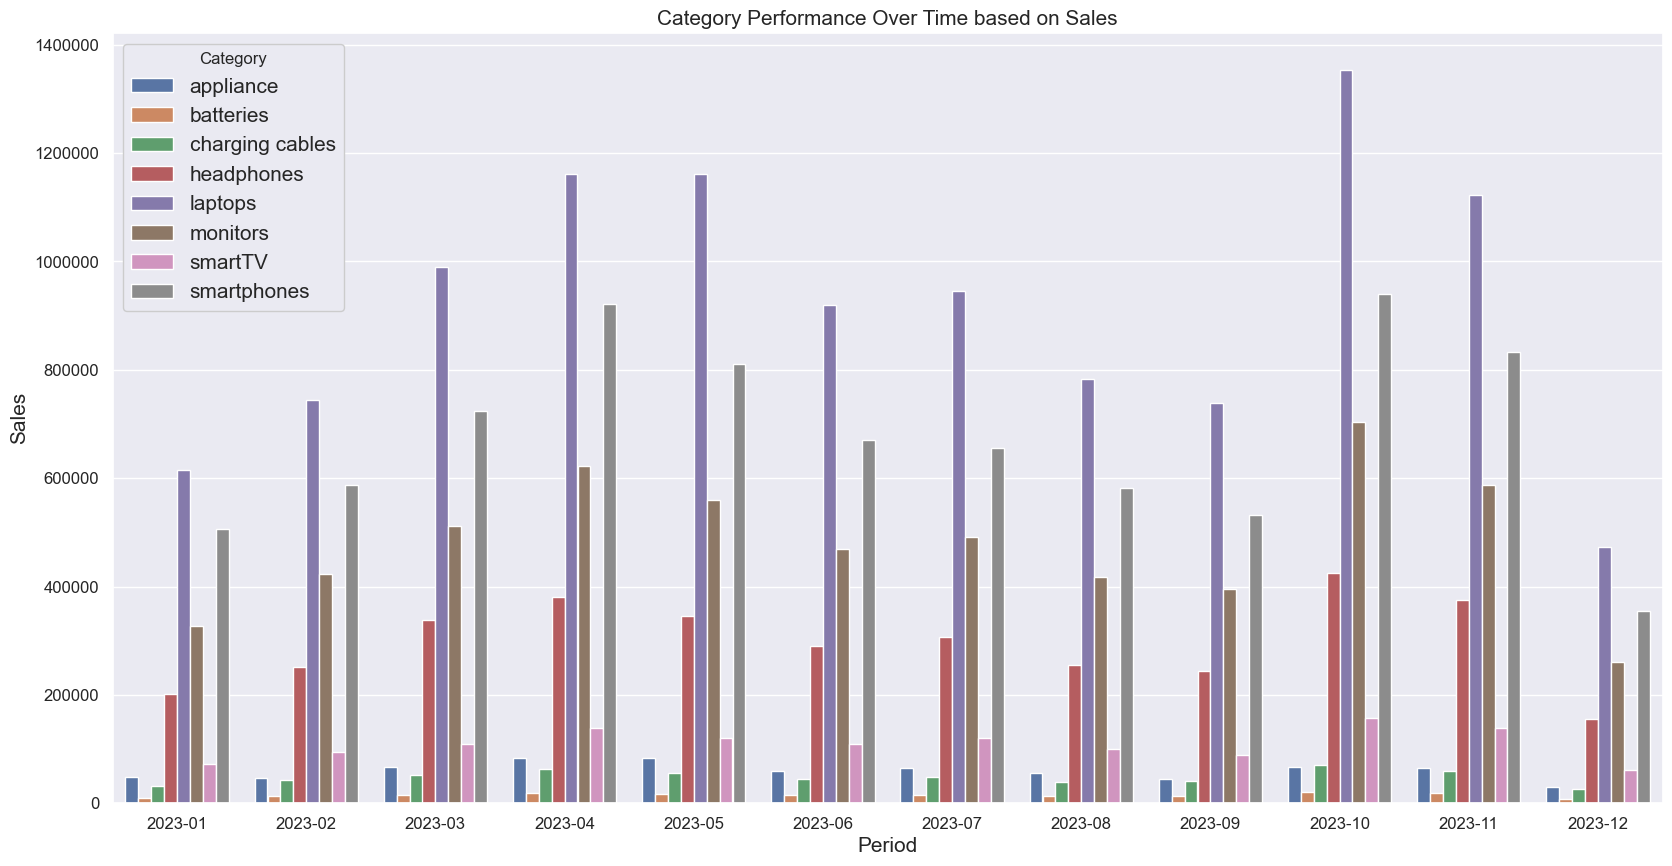

In [79]:
fig = plt.figure(figsize = [20, 10])
ax = sns.barplot(data = sales_by_cat, x = 'period', y = 'sales', hue = 'category', errwidth = 0)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Sales', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('Category Performance Over Time based on Sales', size = 15);

* The laptops category consistently had the highest monthly sales, while the batteries category had the lowest.


### Category Performance Over Time based on Units Sold

In [80]:
qty_cat = sales.groupby(['period', 'category'])['quantity'].sum().reset_index()
qty_cat

,period,category,quantity
0,2023-01,appliance,81
1,2023-01,batteries,3019
2,2023-01,charging cables,2432
3,2023-01,headphones,2554
4,2023-01,laptops,451
...,...,...,...
91,2023-12,headphones,1977
92,2023-12,laptops,338
93,2023-12,monitors,974
94,2023-12,smartTV,204


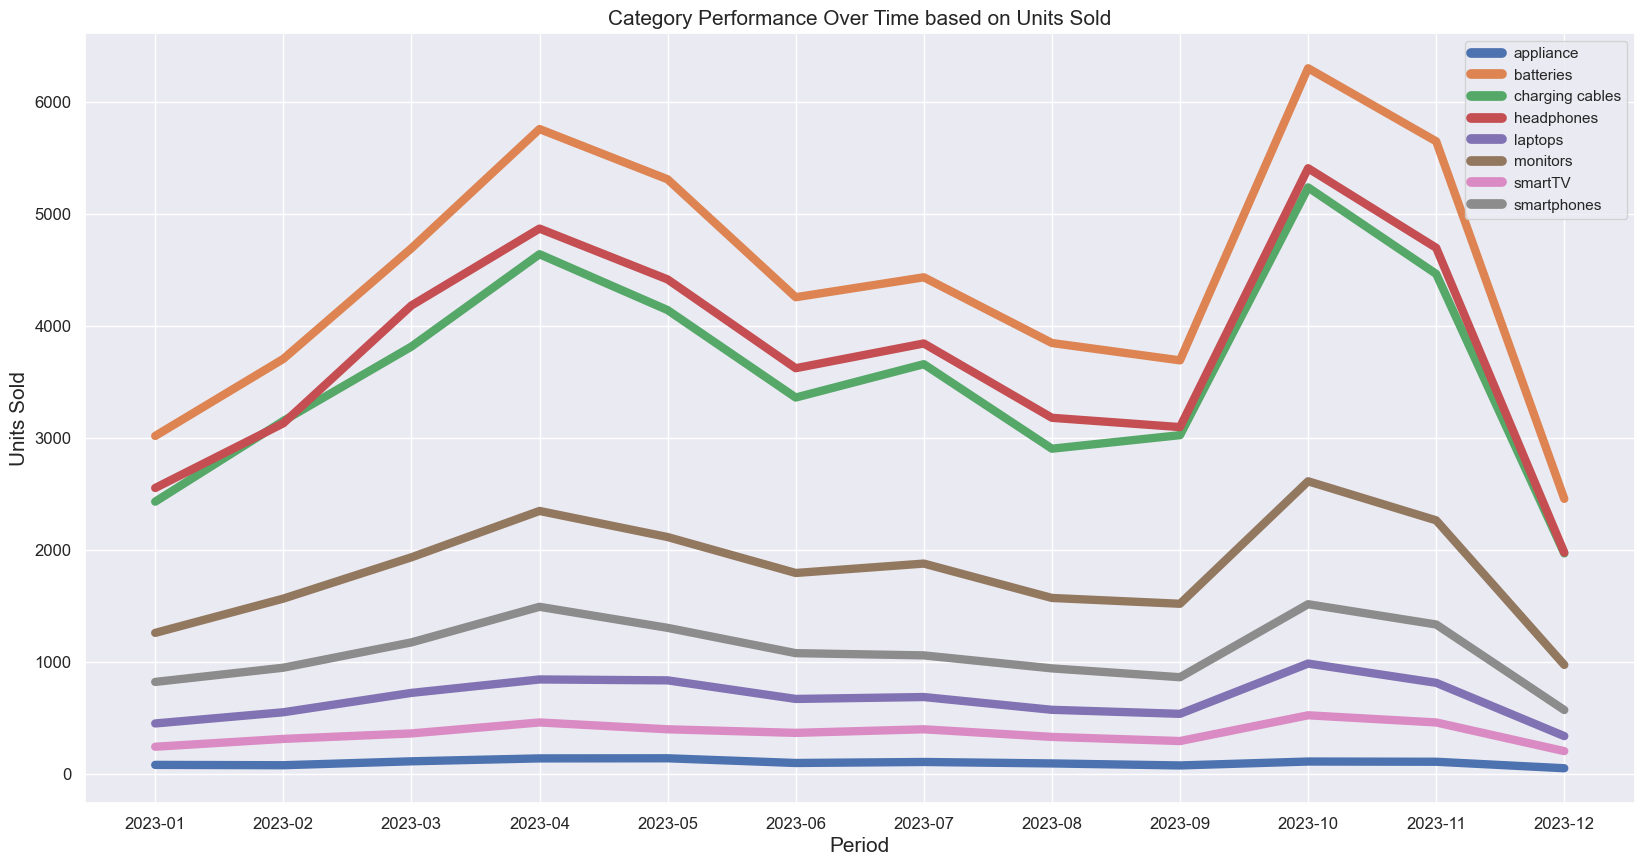

In [81]:
fig = plt.figure(figsize = [20, 10])

ax = sns.lineplot(data=qty_cat, x = qty_cat['period'].astype(str), y = 'quantity', hue = 'category', linewidth = 6)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Units Sold', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('Category Performance Over Time based on Units Sold', size = 15)

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(7)

plt.show()

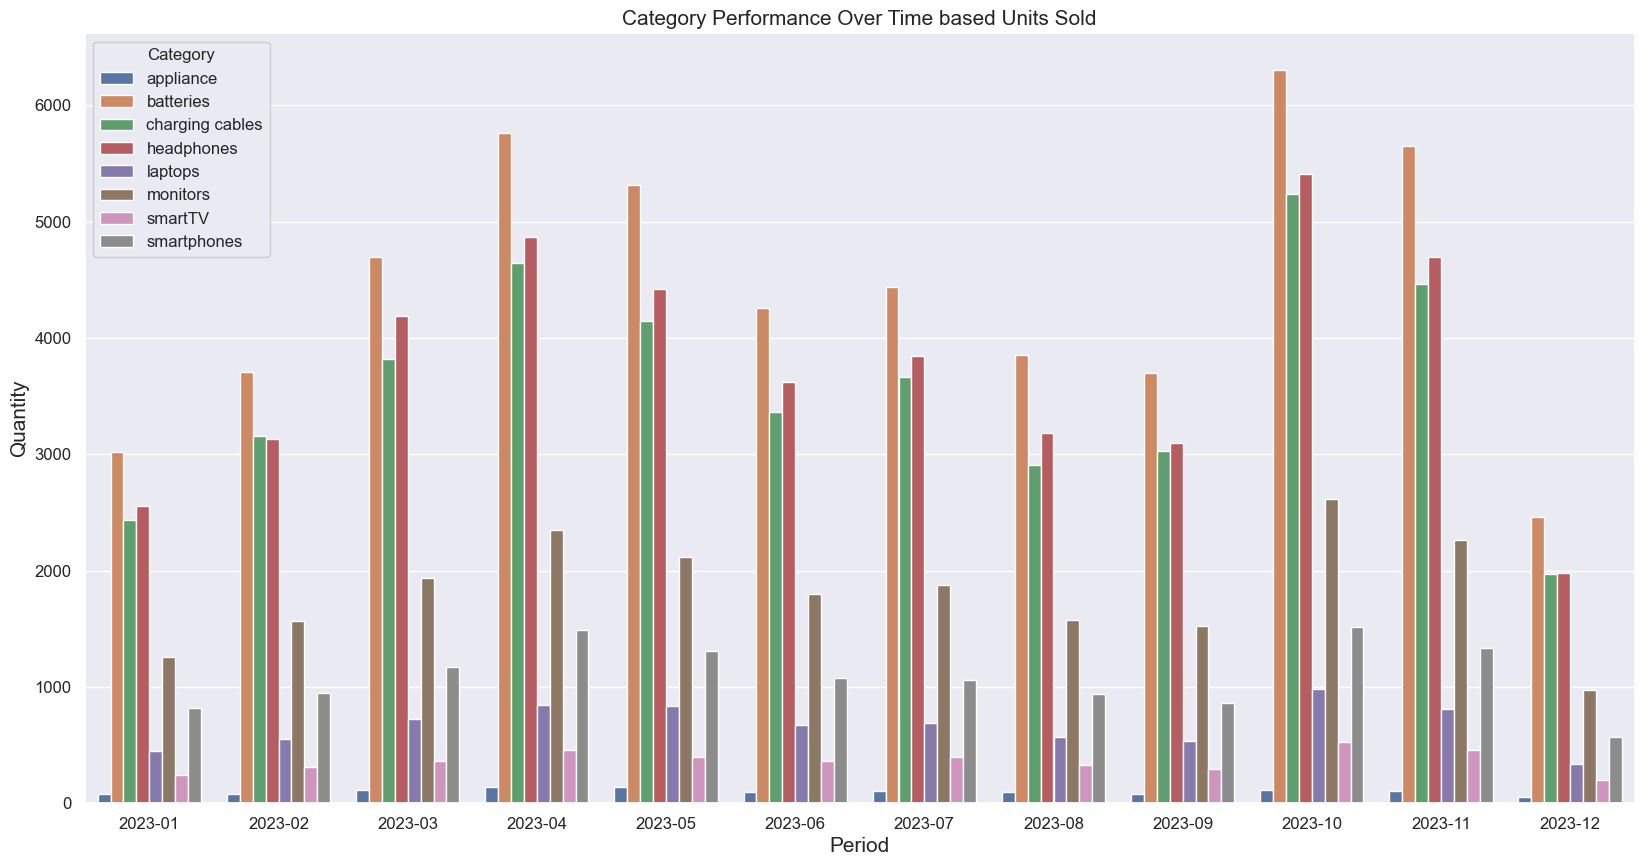

In [83]:

fig = plt.figure(figsize = [20, 10])
ax = sns.barplot(data = qty_cat, x = 'period', y = 'quantity', hue = 'category', errwidth = 0)
ax.set_xlabel('Period', fontsize=15)
ax.set_ylabel('Quantity', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 12)
plt.title('Category Performance Over Time based Units Sold', size = 15);

* The batteries category consistently had the highest units sold, while the appliance category had the lowest.


### Monthly Sales Growth Rate

In [84]:
monthly_sales = sales.groupby(['period'])['sales'].sum().reset_index()
monthly_sales

,period,sales
0,2023-01,1813586.44
1,2023-02,2202022.42
2,2023-03,2807100.38
3,2023-04,3390670.24
4,2023-05,3152606.75
5,2023-06,2577802.26
6,2023-07,2647775.76
7,2023-08,2244467.88
8,2023-09,2097560.13
9,2023-10,3736726.88


In [85]:
monthly_sales['pct_change'] = monthly_sales['sales'].pct_change()
monthly_sales

,period,sales,pct_change
0,2023-01,1813586.44,NaN
1,2023-02,2202022.42,0.214181
2,2023-03,2807100.38,0.274783
3,2023-04,3390670.24,0.207891
4,2023-05,3152606.75,-0.070211
5,2023-06,2577802.26,-0.182327
6,2023-07,2647775.76,0.027145
7,2023-08,2244467.88,-0.152320
8,2023-09,2097560.13,-0.065453
9,2023-10,3736726.88,0.781464


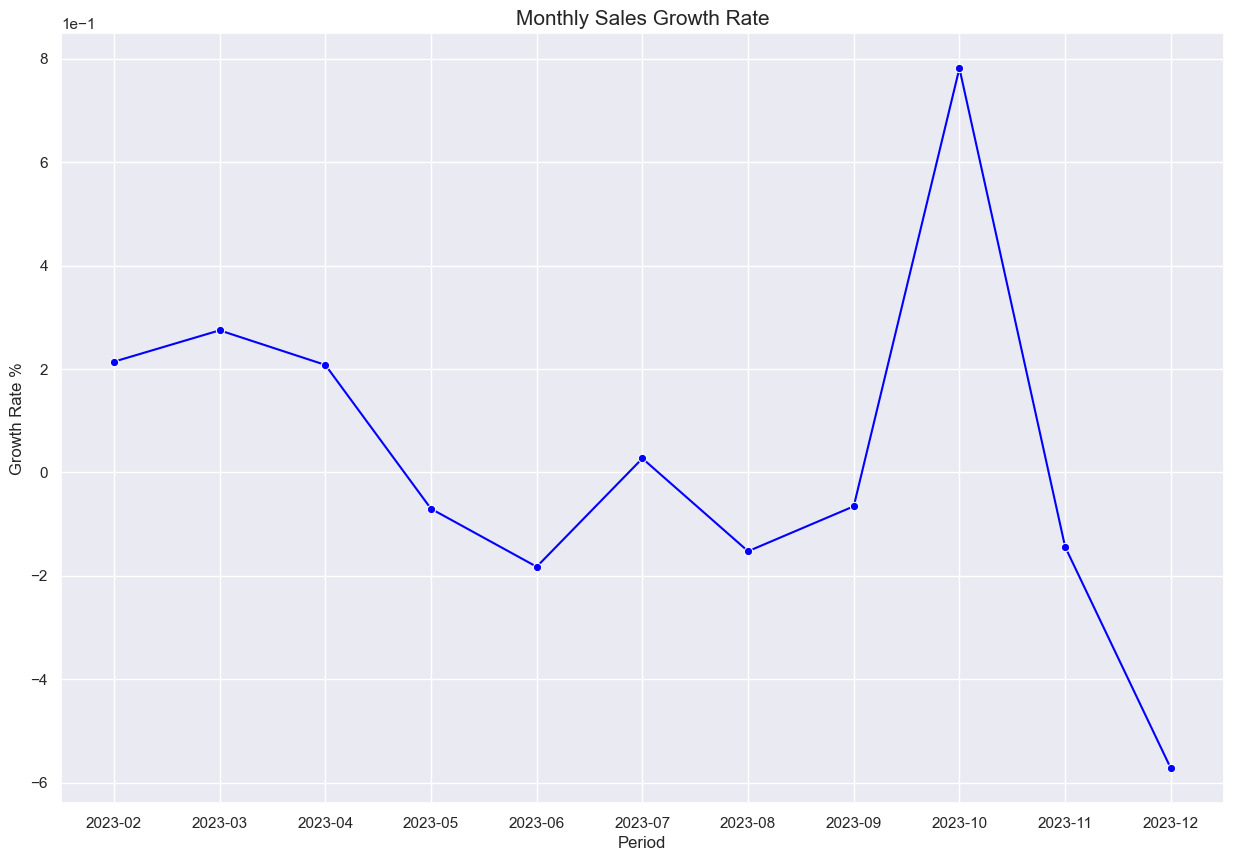

In [86]:
plt.figure(figsize = [15, 10])
sns.lineplot(data=monthly_sales, x = monthly_sales['period'].astype(str), y = 'pct_change', color = 'blue', marker = 'o')
plt.title('Monthly Sales Growth Rate', fontsize = 15)
plt.xlabel('Period', fontsize = 12)
plt.ylabel('Growth Rate %', fontsize = 12)
plt.show()